<div align ="center"><img src="../image/do.png" width ="900"
height ="200"> </div>
<div align ="center">달력</div>



## 대충 주피딴 사용법
#### 1. 대충 사용법
>1. 대충 
>2.  사용법
*         이다
    * 들여쓰기  *ak*와**kana**와***asasd***

## 단축키
<font color='red'>
    
   Command Mode ( press Esc to enable) 

   shift-Enter : run cell, select below

   Ctrl-Enter : run cell

   Alt-Enter : run cell, insert below 

   Y : to code 

   M : to markdown

    B : insert cell below

    X : cut selected cell

    C : copy selected cell

    Shift-V : paste cell above

    V : paste cell below

    Z : undo last cell deletion

   D,D : delete selected cell

   Shift-M : merge cell below

    Edit Mode ( press Enter to enable)

    Shift-Tab : 툴팁표시

   Ctrl-] : indent

    Ctrl-Shift- : split cell
</font>


## pandas
* data frame 과 series(자료형) 그리고 분석을 위한 기능 제공  라이브러리
* 알고있는 그 data frame 단 series의 결합체
* df의 column 을 **series** 라고 부름 /series는 1차원 df는 series 들로 이루어진 2차원

### 엑셀과 유사한데 굳이 쓰는 이유
* 엑셀은 프로그램을 만들 수 없음
* 데이터수정 가공 및 분석 용의
* *numpy* 기반 데이터 처리 빠름
* 수학적 변경, 계산시 엑셀보다 빠름




#### gapminder data

In [2]:
#import pandas
import pandas as pd

In [3]:
df = pd.read_csv('../data/gapminder.tsv',sep='\t') # sep seperate 구분자
#df = pandas.read_csv('../data/gapminder.tsv',sep='\t') 
#df

#####  데이터 보기

In [4]:
print(df.head()) #r 과 다르게 head 5개 r은 6개
    # print를 굳이 쓰는 이유 있음 많이 불러올 때 print용의함
print(type(df))
print(df.shape)
b=df.shape[0]
print("col 개수 =%d"%b)
a=df.columns
print("col =%s"%a)
c=df.dtypes
print("col 자료형=%s"%c)

df.dtypes

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
<class 'pandas.core.frame.DataFrame'>
(1704, 6)
col 개수 =1704
col =Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')
col 자료형=country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object


country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

##### 자료형 비교 
* 판다스 파이썬 
* object vs string 
* int64  vs int
* float64  vs float
* datetime64 vs datetime

In [5]:
df.info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


##### 열단위 추출

In [6]:
country_df=df['country']
type(country_df)
country_df.head()
country_df.tail()


1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object

In [7]:
subset= df[['country','continent','year']]
print(subset.head())
print(subset.tail())
print(type(subset))


       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972
       country continent  year
1699  Zimbabwe    Africa  1987
1700  Zimbabwe    Africa  1992
1701  Zimbabwe    Africa  1997
1702  Zimbabwe    Africa  2002
1703  Zimbabwe    Africa  2007
<class 'pandas.core.frame.DataFrame'>


#####  loc 속성 행 데이터 추출

In [8]:
df.loc[106]
#df.loc[-1] error  
print(df.shape)    #위에 있음
print(df.shape[0]) 


(1704, 6)
1704


##### loc 마지막 행  추출

In [9]:
number_of_rows = df.shape[0]            #1704  개수는 1704 0~1703
last_row_index = number_of_rows -1      #1703  0부터 니까  마지막은 1703
print(df.loc[last_row_index])               

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


##### loc , tail이 반환하는 자료형  다르다

In [10]:
df.loc[[0,99,999]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
99,Bangladesh,Asia,1967,43.453,62821884,721.186086
999,Mongolia,Asia,1967,51.253,1149500,1226.041130


In [11]:
df.tail(n=1)

,country,continent,year,lifeExp,pop,gdpPercap
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [12]:
s_loc =df.loc[0]
s_tail=df.tail(n=1)
print(type(s_loc))     #series
print(type(s_tail))    #data frame
s_loc

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

##### iloc 행 추출
* loc 는 df의 index 기준 추출 'index명으로 '
* iloc 는 데이터의 순서 의미하는 행번호를 기준으로 데이터 추출    '정수형 위치 인덱스'
* https://bigdaheta.tistory.com/41

In [111]:
df.loc[[1,99]]   #,#-1]   #-1 오류  하지만 iloc 가능!

,country,continent,year,lifeExp,pop,gdpPercap
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
99,Bangladesh,Asia,1967,43.453,62821884,721.186086


In [108]:
df.iloc[[1,99,-1]]  #그  외에는 일단 loc와 다를게 없어 보인다.

,country,continent,year,lifeExp,pop,gdpPercap
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
99,Bangladesh,Asia,1967,43.453,62821884,721.186086
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


##### 데이터 추출  slicing & range

In [114]:
subset =  df.loc[:,['year','pop']] #[행 , 열]  # 행 ':' 처음부터 끝까지
print(subset.head())

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460


In [116]:
subset = df.iloc[:,[2,4,-1]]   # 열 3번 째 5번째 그리고 마지막 열 가져오기
print(subset.head()) 

   year       pop   gdpPercap
0  1952   8425333  779.445314
1  1957   9240934  820.853030
2  1962  10267083  853.100710
3  1967  11537966  836.197138
4  1972  13079460  739.981106


In [119]:
small_range = list(range(5))
print(small_range)

[0, 1, 2, 3, 4]


In [120]:
print(type(small_range))

<class 'list'>


In [123]:
subset= df.iloc[:,small_range]   #small_range 위에서 선언함
print(subset.head())

       country continent  year  lifeExp       pop
0  Afghanistan      Asia  1952   28.801   8425333
1  Afghanistan      Asia  1957   30.332   9240934
2  Afghanistan      Asia  1962   31.997  10267083
3  Afghanistan      Asia  1967   34.020  11537966
4  Afghanistan      Asia  1972   36.088  13079460


In [130]:
a=list(range(3,6))
print(a)
subset = df.iloc[:,a]
print(subset.head())

[3, 4, 5]
   lifeExp       pop   gdpPercap
0   28.801   8425333  779.445314
1   30.332   9240934  820.853030
2   31.997  10267083  853.100710
3   34.020  11537966  836.197138
4   36.088  13079460  739.981106


In [131]:
subset = df.iloc[:,small_range]
print(subset.head())

       country continent  year  lifeExp       pop
0  Afghanistan      Asia  1952   28.801   8425333
1  Afghanistan      Asia  1957   30.332   9240934
2  Afghanistan      Asia  1962   31.997  10267083
3  Afghanistan      Asia  1967   34.020  11537966
4  Afghanistan      Asia  1972   36.088  13079460


In [132]:
subset = df.iloc[:, :3]
print(subset.head())

       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972


##### loc 에 열 지정 값에 정수 리스트 전달시 오류

In [142]:
print(df.iloc[[0,99,999],[0,3,5]])
print(df.loc[[0,99,999], \
             ['country','lifeExp','gdpPercap']]) # \연결 연산자
print(df.loc[10:13,\
            ['country','lifeExp','gdpPercap']])
#print(df.loc[10:13,\
#             ,[0,3,5]]) error  loc 는 정수형 list로 전달하면 오류 

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130
         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130
        country  lifeExp    gdpPercap
10  Afghanistan   42.129   726.734055
11  Afghanistan   43.828   974.580338
12      Albania   55.230  1601.056136
13      Albania   59.280  1942.284244


loc           iloc 
인덱스 이름   정수형 위치 인덱스
['a','b']     [3:7]

#### 그룹화 평균 계산

In [149]:
df.groupby('year')

In [147]:
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [151]:
type(df.groupby('year')['lifeExp'].mean())

pandas.core.series.Series

In [153]:
mean=df.groupby('year')['lifeExp'].mean()
print(mean)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


##### lifeExp,gdpPercap 열 평균값  연도,지역 으로 그룹화

In [156]:
m_g_v =df.groupby(['year','continent'])\
[['lifeExp','gdpPercap']].mean()
print(m_g_v)

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699


##### 그룹화한 데이터 개수 세기 :빈도수  nuinque 

In [157]:
print(df.groupby('continent')['country'].nunique())

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64


##### matplotlib

In [164]:
%matplotlib inline      
import matplotlib.pyplot as pl #inline 노트북 상에 그리겠다는 의미

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


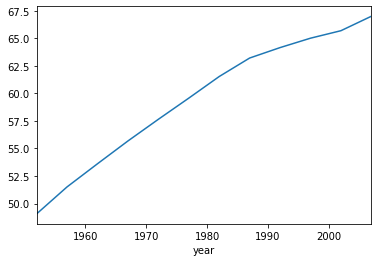

In [167]:
gl_a= df.groupby('year')['lifeExp'].mean()
print(gl_a)
gl_a.plot()

In [169]:
# dataframe series index
#인덱스 와 시리즈는  key와 value 관계 아마도 col명과 col 내용의 관계를 그리는 듯 하다.

## 문제 1

In [171]:
#import pandas as pd
df = pd.read_csv('../data/cctv.csv')
df

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673,162.948104
5,광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,0.189970,425.290264
6,구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,0.348536,329.592918
7,금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.397911,35.989293
8,노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,0.222170,125.483618
9,도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.139110,616.501341


In [172]:
print(df.head())
print(df.tail())

    구별    소계       최근증가율       인구수       한국인      외국인      고령자     외국인비율  \
0  강남구  2780  150.619195  570500.0  565550.0   4950.0  63167.0  0.867660   
1  강동구   773  166.490765  453233.0  449019.0   4214.0  54622.0  0.929765   
2  강북구   748  125.203252  330192.0  326686.0   3506.0  54813.0  1.061806   
3  강서구   884  134.793814  603772.0  597248.0   6524.0  72548.0  1.080540   
4  관악구  1496  149.290780  525515.0  507203.0  18312.0  68082.0  3.484582   

       고령자비율    CCTV비율           오차  
0  11.072217  0.487292  1388.055355  
1  12.051638  0.170552   465.422892  
2  16.600342  0.226535   329.342026  
3  12.015794  0.146413   551.503155  
4  12.955291  0.284673   162.948104  
     구별    소계       최근증가율       인구수       한국인      외국인      고령자     외국인비율  \
20  용산구  1624   53.216374  244203.0  229456.0  14747.0  36231.0  6.038828   
21  은평구  1873   85.237258  494388.0  489943.0   4445.0  72334.0  0.899091   
22  종로구  1002  248.922414  162820.0  153589.0   9231.0  25425.0  5.669451   
23   중구

In [173]:
df[['구별','한국인','CCTV비율']]

,구별,한국인,CCTV비율
0,강남구,565550.0,0.487292
1,강동구,449019.0,0.170552
2,강북구,326686.0,0.226535
3,강서구,597248.0,0.146413
4,관악구,507203.0,0.284673
5,광진구,357211.0,0.189970
6,구로구,416487.0,0.348536
7,금천구,236353.0,0.397911
8,노원구,565565.0,0.222170
9,도봉구,346629.0,0.139110


In [174]:
df.loc[[7,10,20]]

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
7,금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.397911,35.989293
10,동대문구,1294,74.766355,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322,0.350207,165.202586
20,용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


In [175]:
df.columns

Index(['구별', '소계', '최근증가율', '인구수', '한국인', '외국인', '고령자', '외국인비율', '고령자비율',
       'CCTV비율', '오차'],
      dtype='object')

## pandas series and df

In [192]:
s=pd.Series(['apple',33])
print(type(s))

<class 'pandas.core.series.Series'>


In [193]:
idx= s.index
val=s.values
print(idx)
print('\n')
print(val)

RangeIndex(start=0, stop=2, step=1)


['apple' 33]


##### list 를 series로

In [185]:
list_data = ['2021_04_28',3.14,'orajava',100,True]
s1=pd.Series(list_data)
print(list_data)
print(s1)

['2021_04_28', 3.14, 'orajava', 100, True]
0    2021_04_28
1          3.14
2       orajava
3           100
4          True
dtype: object


In [190]:
idx= s1.index
val=s1.values
print(idx)
print('\n')
print(val)

RangeIndex(start=0, stop=5, step=1)


['2021_04_28' 3.14 'orajava' 100 True]


##### dictonary 를 series로

In [189]:
dict_data={'a':1,'b':2,'c':3}    #key 가 index  #vlaue 가 series
s2=pd.Series(dict_data)
print(s2)
print(type(s2))

a    1
b    2
c    3
dtype: int64
<class 'pandas.core.series.Series'>


In [191]:
idx= s2.index
val=s2.values
print(idx)
print('\n')
print(val)

Index(['a', 'b', 'c'], dtype='object')


[1 2 3]


#####  series와 index 직접 설정

In [196]:
s3= pd.Series(['Jane','student'],index=['Person','Job'])
print(s3)

Person       Jane
Job       student
dtype: object


## dictionary로 df 생성
* df의 column은 모두 series 이다

In [200]:
Scientists=pd.DataFrame({
    'Name':['Rosaline Franklin','William Gosset'],
    'Occupation':['Chemist','Statistician'],
    'Born':['1920-07-25','1876-06-13'],
    'Died':['1958-04-16','1937-10-16'],
    'Age':['37','61']

})
Scientists
Scientists.shape
type(Scientists)

pandas.core.frame.DataFrame

##### column인자 사용하면 df 열순서 지정 가능

In [208]:
Scientists2=pd.DataFrame(
    data={'Occupation':['Chemist','Statistician'],
    'Born':['1920-07-25','1876-06-13'],
    'Died':['1958-04-16','1937-10-16'],
    'Age':['37','61']},
    index=['Rosaline Franklin','William Gosset'],
    columns=['Occupation','Born', 'Age','Died'])
Scientists2

,Occupation,Born,Age,Died
Rosaline Franklin,Chemist,1920-07-25,37,1958-04-16
William Gosset,Statistician,1876-06-13,61,1937-10-16


##### dictionary는 순서 보장 x >> OrderedDict클래스 사용

In [213]:
from collections import OrderedDict
Scientists3=pd.DataFrame(OrderedDict([
    ('Name',['Rosaline Franklin','William Gosset']),
    ('Occupation',['Chemist','Statistician']),
    ('Born',['1920-07-25','1876-06-13']),
    ('Died',['1958-04-16','1937-10-16']),
    ('Age',['37','61']) ]))
print(Scientists3)   

                Name    Occupation        Born        Died Age
0  Rosaline Franklin       Chemist  1920-07-25  1958-04-16  37
1     William Gosset  Statistician  1876-06-13  1937-10-16  61


##### df에서 series만들기

In [216]:
Scientists4=pd.DataFrame(
    data={'Occupation':['Chemist','Statistician'],
    'Born':['1920-07-25','1876-06-13'],
    'Died':['1958-04-16','1937-10-16'],
    'Age':['37','61']},
    index=['Rosaline Franklin','William Gosset'],
    columns=['Occupation','Born', 'Died','Age'])

In [219]:
first_row =Scientists4.loc['William Gosset']
print(type(first_row))
print(first_row)

<class 'pandas.core.series.Series'>
Occupation    Statistician
Born            1876-06-13
Died            1937-10-16
Age                     61
Name: William Gosset, dtype: object


##### index values속성, keys 메서드 사용

In [224]:
print(first_row.index)
print(first_row.index[3])

Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')
Age


In [222]:
print(first_row.values)

['Statistician' '1876-06-13' '1937-10-16' '61']


In [225]:
print(first_row.keys())   #index와 같은역할
print(first_row.keys()[0])


Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')
Occupation


##### series  의 mean min max std  사용  &nbsp; &nbsp;&nbsp; 여기 부터 아래 꺼 다시 보기

In [7]:
ages = Scientists7['Age']
print(ages)
print(type(ages))
print(ages.mean())
print(ages.min())
print(ages.max())
print(ages.std())


0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64
<class 'pandas.core.series.Series'>
59.125
37
90
18.325918413937288


##### series 와 bulean 추출

In [6]:
Scientists7=pd.read_csv('../data/scientists.csv')
ages= Scientists7['Age']
print(ages.max())
print(ages.mean())

90
59.125


In [261]:
print(ages[ages>ages.mean()])
print(ages > ages.mean()) #이렇게 하면bulean 나옴

1    61
2    90
3    66
7    77
Name: Age, dtype: int64
0    False
1     True
2     True
3     True
4    False
5    False
6    False
7     True
Name: Age, dtype: bool


In [262]:
manual_bool_values = \
[True,True,False,False,True,True,False,True]
print(ages[manual_bool_values])

0    37
1    61
4    56
5    45
7    77
Name: Age, dtype: int64


##### vector scalar broadcast    방향성을 지닌 값 , scalar 그저 크기만 가지는 값..,  broadacast --모든 값에 영향을 미친다.

In [269]:
print(ages+ages)
print(ages*ages) #vector broadcast
print(ages+100) #scalar broadcast
print(ages*2)  #scalar broadcast

print(pd.Series([1,100]))
print(ages + pd.Series([1,100]))  # 길이가 서로 다른 백터 연산으로 서로 같은 인덱스 값만 계산된다. /broadcast 안됨


0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64
0    1369
1    3721
2    8100
3    4356
4    3136
5    2025
6    1681
7    5929
Name: Age, dtype: int64
0    137
1    161
2    190
3    166
4    156
5    145
6    141
7    177
Name: Age, dtype: int64
0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64
0      1
1    100
dtype: int64
0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64


In [273]:
rev_ages = ages.sort_index(ascending=False)
print(rev_ages)
print(ages)
print(ages+ rev_ages) # vector 끼리 연산은 일치하는 인덱스 값끼리 수행  /broadcast 아니다( 누락값 없어도)


7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64
0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64
0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64


In [10]:
print(Scientists7[Scientists7['Age']>Scientists7['Age'].mean()])

                   Name        Born        Died  Age     Occupation
1        William Gosset  1876-06-13  1937-10-16   61   Statistician
2  Florence Nightingale  1820-05-12  1910-08-13   90          Nurse
3           Marie Curie  1867-11-07  1934-07-04   66        Chemist
7          Johann Gauss  1777-04-30  1855-02-23   77  Mathematician


In [11]:
Scientists7

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


##### Series와 df 

In [12]:
print(Scientists7['Born'].dtype)      #Scientist 의 출처 알아내기    
print(Scientists7['Died'].dtype)
Born_dt=pd.to_datetime(Scientists7['Born'],format='%Y-%m-%d')  # 날짜 타입으로 변경
print(Born_dt)
Died_dt=pd.to_datetime(Scientists7['Died'],format='%Y-%m-%d')
print(Died_dt)


object
object
0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]
0   1958-04-16
1   1937-10-16
2   1910-08-13
3   1934-07-04
4   1964-04-14
5   1858-06-16
6   1954-06-07
7   1855-02-23
Name: Died, dtype: datetime64[ns]


##### row 열추가

In [16]:
Scientists7['Born_dt'],Scientists7['Died_dt']=\
(Born_dt, Died_dt)
print(Scientists7.head())
print(Scientists7.shape)


                   Name        Born        Died  Age    Occupation    Born_dt  \
0     Rosaline Franklin  1920-07-25  1958-04-16   37       Chemist 1920-07-25   
1        William Gosset  1876-06-13  1937-10-16   61  Statistician 1876-06-13   
2  Florence Nightingale  1820-05-12  1910-08-13   90         Nurse 1820-05-12   
3           Marie Curie  1867-11-07  1934-07-04   66       Chemist 1867-11-07   
4         Rachel Carson  1907-05-27  1964-04-14   56     Biologist 1907-05-27   

     Died_dt  
0 1958-04-16  
1 1937-10-16  
2 1910-08-13  
3 1934-07-04  
4 1964-04-14  
(8, 7)


In [17]:
Scientists7['a_d_dt']= (Scientists7['Died_dt']-\
                      Scientists7['Born_dt'])
print(Scientists7)

                   Name        Born        Died  Age          Occupation  \
0     Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist   
1        William Gosset  1876-06-13  1937-10-16   61        Statistician   
2  Florence Nightingale  1820-05-12  1910-08-13   90               Nurse   
3           Marie Curie  1867-11-07  1934-07-04   66             Chemist   
4         Rachel Carson  1907-05-27  1964-04-14   56           Biologist   
5             John Snow  1813-03-15  1858-06-16   45           Physician   
6           Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist   
7          Johann Gauss  1777-04-30  1855-02-23   77       Mathematician   

     Born_dt    Died_dt     a_d_dt  
0 1920-07-25 1958-04-16 13779 days  
1 1876-06-13 1937-10-16 22404 days  
2 1820-05-12 1910-08-13 32964 days  
3 1867-11-07 1934-07-04 24345 days  
4 1907-05-27 1964-04-14 20777 days  
5 1813-03-15 1858-06-16 16529 days  
6 1912-06-23 1954-06-07 15324 days  
7 1777-04-30 1855-0

##### series df 섞기

In [18]:
print(Scientists7['Age'])

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64


##### 무의미한것

In [21]:
import random
random.seed(42)
random.shuffle(Scientists7['Age'])
print(Scientists7['Age'])

0    77
1    90
2    37
3    61
4    41
5    45
6    66
7    56
Name: Age, dtype: int64


##### 열삭제

In [22]:
S_drp = Scientists7.drop(['Age'],axis=1)
print(S_drp.columns)

Index(['Name', 'Born', 'Died', 'Occupation', 'Born_dt', 'Died_dt', 'a_d_dt'], dtype='object')


# 주말 숙제  
 >1. html 공부